In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle
# 导入向量化后的数据集
np_vectorized_tfidf = pickle.load(open('vectorized_generated_corpus_tfidf.pkl', 'rb'))

In [3]:
np_vectorized_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17705395, 0.1748451 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21242656,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [4]:
np_vectorized_tfidf.shape

(1200, 48)

In [5]:
np_vectorized_tfidf.dtype

dtype('float64')

In [6]:
# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = np_vectorized_tfidf,
                                      batch_size = 32,
                                      shuffle = True)

In [7]:
# Creating a PyTorch class
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 48 ==> 5
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(48, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 5),
        ).double() # Change parameters dtype to double
        
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 5 ==> 48
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(5, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 48),
            # torch.nn.Sigmoid()
        ).double() # Change parameters dtype to double

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return (encoded, decoded) # encoded is the result of dimensionality reduction

In [8]:
# Model Initialization
model = AE()
# model.cuda()  # move the model to GPU

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.01
optimizer = torch.optim.Adam(model.parameters(),
							lr = 0.01,
							weight_decay = 0.00000001)

In [9]:
epochs = 100
iters = 0
outputs = []
losses = []

for epoch in range(1, epochs + 1):
    print('Epoch:', epoch)
    for essay in loader:
        iters += 1

        # essay = essay.cuda()  # move data to GPU

        # Output of Autoencoder
        _, reconstructed = model(essay)

        # Calculating the loss function
        loss = loss_function(reconstructed, essay)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())
        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is: {loss.item()}")

    outputs.append((epoch, essay, reconstructed))

Epoch: 1
Epoch: 2
Epoch: 3
Iteration: 100, loss is: 0.01480977361185908
Epoch: 4
Epoch: 5
Epoch: 6
Iteration: 200, loss is: 0.013845899538625632
Epoch: 7
Epoch: 8
Iteration: 300, loss is: 0.012372487142526594
Epoch: 9
Epoch: 10
Epoch: 11
Iteration: 400, loss is: 0.012548577734075467
Epoch: 12
Epoch: 13
Epoch: 14
Iteration: 500, loss is: 0.01213398475410162
Epoch: 15
Epoch: 16
Iteration: 600, loss is: 0.010716216317830285
Epoch: 17
Epoch: 18
Epoch: 19
Iteration: 700, loss is: 0.01091592974199619
Epoch: 20
Epoch: 21
Epoch: 22
Iteration: 800, loss is: 0.012166831204735886
Epoch: 23
Epoch: 24
Iteration: 900, loss is: 0.012521435050988614
Epoch: 25
Epoch: 26
Epoch: 27
Iteration: 1000, loss is: 0.01091111687154355
Epoch: 28
Epoch: 29
Iteration: 1100, loss is: 0.010697838910276989
Epoch: 30
Epoch: 31
Epoch: 32
Iteration: 1200, loss is: 0.010725533059784019
Epoch: 33
Epoch: 34
Epoch: 35
Iteration: 1300, loss is: 0.011618865024146913
Epoch: 36
Epoch: 37
Iteration: 1400, loss is: 0.0109719067173

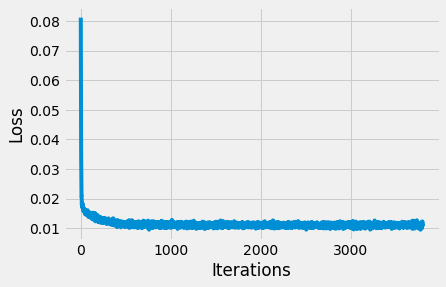

In [10]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

In [11]:
outputs[-1]

(100,
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2144, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.2713, 0.3991, 0.0000, 0.1352, 0.1328,
          0.1340, 0.0000, 0.0000, 0.0000, 0.0000, 0.1322, 0.0000, 0.0000, 0.0000,
          0.2871, 0.0000, 0.0000, 0.2891, 0.0000, 0.2841, 0.0000, 0.5643, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.2059, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2055],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1806, 0.0000, 0.2432, 0.1206, 0.1183, 0.2424, 0.7213, 0.2361,
          0.2383, 0.0000, 0.1182, 0.1205, 0.0000, 0.2352, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1934,
          0.1831, 0.0000, 0.1828],
         [0.0000, 0.3848, 0.0000, 0.4054, 0.3904, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.00

## 保存模型参数

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# 保存模型参数
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/model/SixTypes-AutoEncoder-K-Means-TFIDF-5d-Simplified.pth')

## 加载模型参数

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 加载模型参数
model = AE()
model.cuda() # move the model to GPU

model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/model/SixTypes-AutoEncoder-K-Means-TFIDF-5d-Simplified.pth'))

<All keys matched successfully>

In [15]:
# Dimensionality Reduction by the trained AE model

# decomposition_data = []
# for essay in np_vectorized_tfidf:
#     essay = torch.from_numpy(essay).cuda()
#     encoded, decoded = model(essay)
#     decomposition_data.append(encoded.cpu().data.numpy())

# decomposition_data = np.array(decomposition_data)

decomposition_data = []
for essay in np_vectorized_tfidf:
    essay = torch.from_numpy(essay)
    encoded, decoded = model(essay)
    decomposition_data.append(encoded.cpu().data.numpy())

decomposition_data = np.array(decomposition_data)

In [16]:
decomposition_data

array([[-0.18411986, -0.35098611, -0.37722369, -0.07831558, -0.13851099],
       [-0.0812006 , -0.39199324, -0.42218713,  0.15540247, -0.02879153],
       [ 0.09384063, -0.24124835, -0.20892241,  0.18309408,  0.0303569 ],
       ...,
       [ 0.23063913, -0.30619715,  0.18892097, -0.04918884, -0.08726488],
       [ 0.04432484, -0.29743748,  0.15363896, -0.12329946,  0.1467769 ],
       [ 0.17496851, -0.33919641,  0.2644799 , -0.04696265, -0.05482302]])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


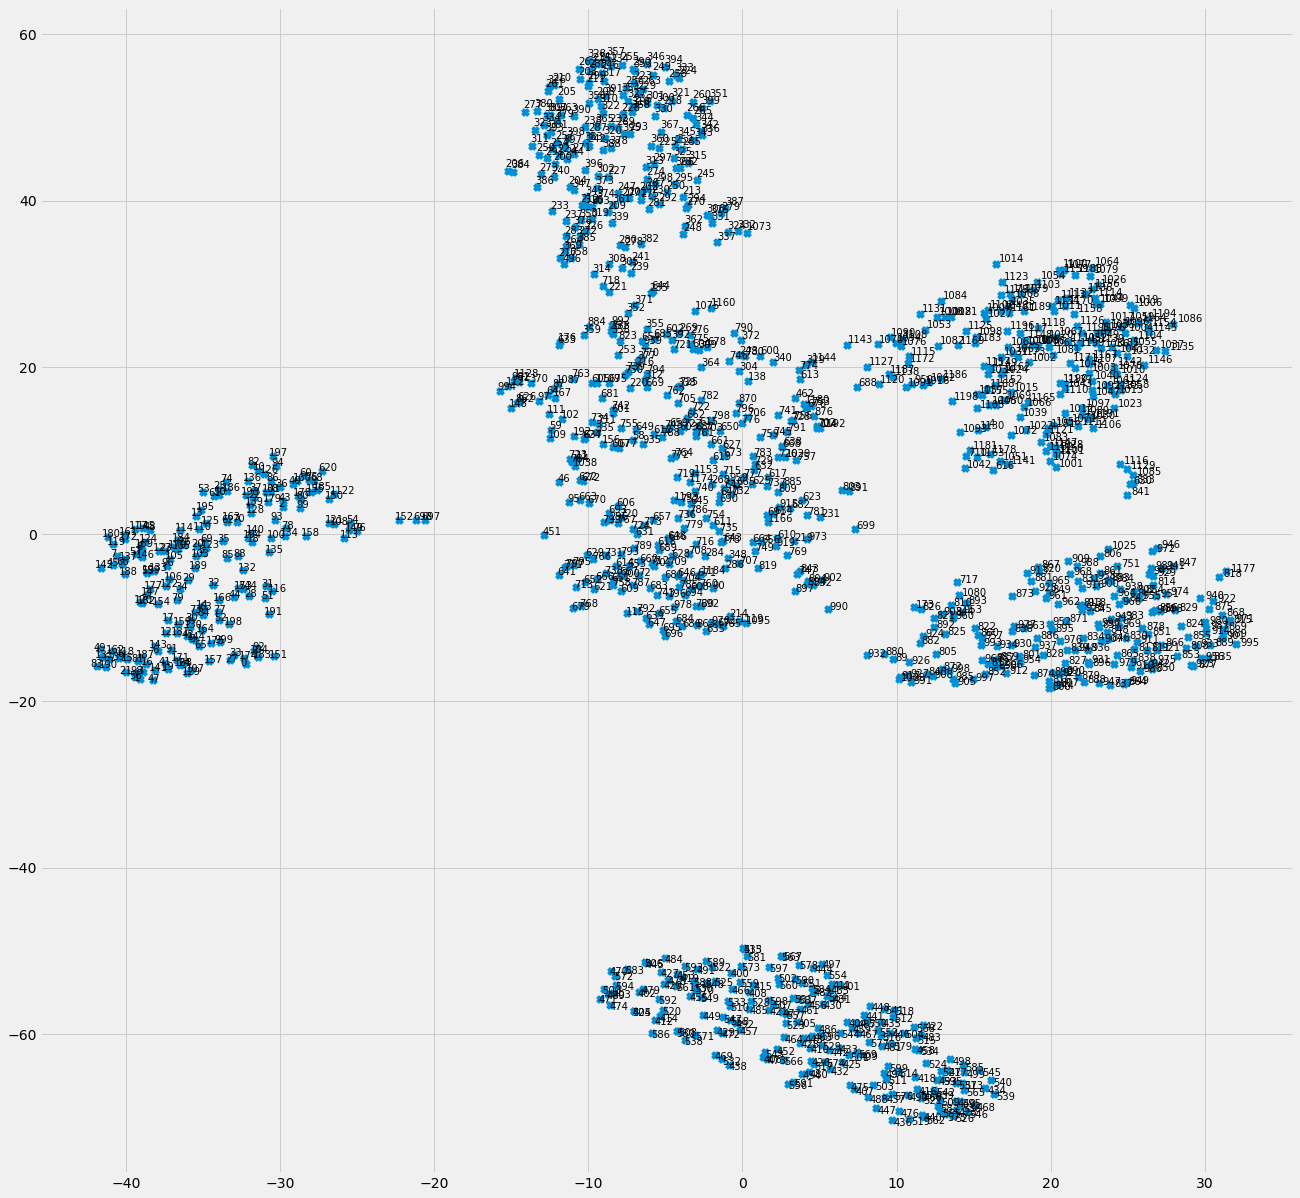

In [17]:
from sklearn.manifold import TSNE
# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data_2d = tsne.fit_transform(decomposition_data)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], marker='x')
for i in range(len(decomposition_data_2d)):
    plt.text(decomposition_data_2d[:, 0][i] * 1.01, decomposition_data_2d[:, 1][i] * 1.01, i, fontsize=10)
plt.show()

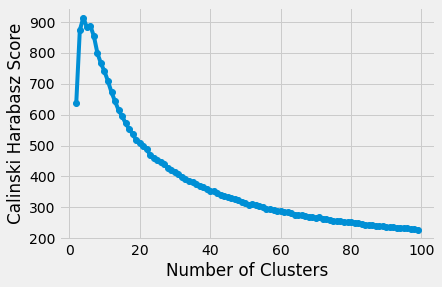

In [18]:
# K-means 算法聚类并利用 Calinski Harabasz Score 评估效果
from sklearn.cluster import KMeans
from sklearn import metrics
calinski_harabasz_score_list = []
for n_cluster in range(2, 100):
    y_pred = KMeans(n_clusters=n_cluster, init='k-means++', random_state=9).fit_predict(decomposition_data)
    current_score = metrics.calinski_harabasz_score(decomposition_data, y_pred)
    calinski_harabasz_score_list.append(current_score)

plt.plot(range(2,100), calinski_harabasz_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

In [19]:
calinski_harabasz_score_list.index(max(calinski_harabasz_score_list))

2

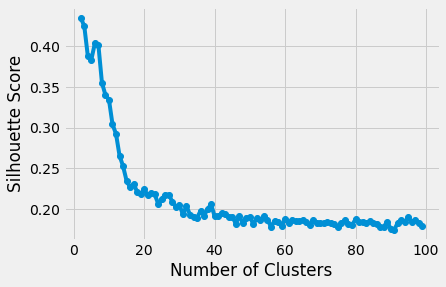

In [20]:
# K-means 算法聚类并利用 Silhouette Score（轮廓系数）评估效果
silhouette_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = metrics.silhouette_score(decomposition_data, km.labels_ , metric='euclidean')
    silhouette_score_list.append(current_score)

plt.plot(range(2,100), silhouette_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [21]:
silhouette_score_list.index(max(silhouette_score_list))

0

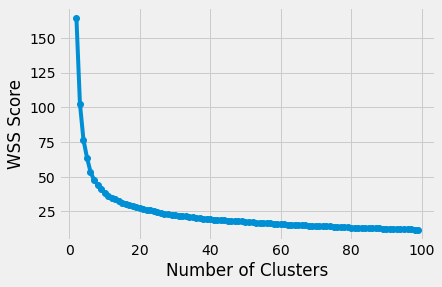

In [22]:
# K-means 算法聚类并利用 WSS（Within-cluster Sum of Squares）评估效果
WSS_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = km.inertia_
    WSS_score_list.append(current_score)

plt.plot(range(2,100), WSS_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.show()

## 用 AutoEncoder 降到 5 维后直接用 K-means 来聚类

In [23]:
# 选用 k 值做 K-means 算法聚类（用 AutoEncoder 降到 5 维后直接用 K-means 聚类）
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data)

In [24]:
print(y_pred[:10])

[1 1 1 1 5 1 1 1 1 1]


In [25]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data_2d)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data_2d[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data_2d[i]))

In [26]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

1 -34.002304
5 13.915855
3 -2.9520333
4 21.075655
0 -7.944354
2 4.6631956


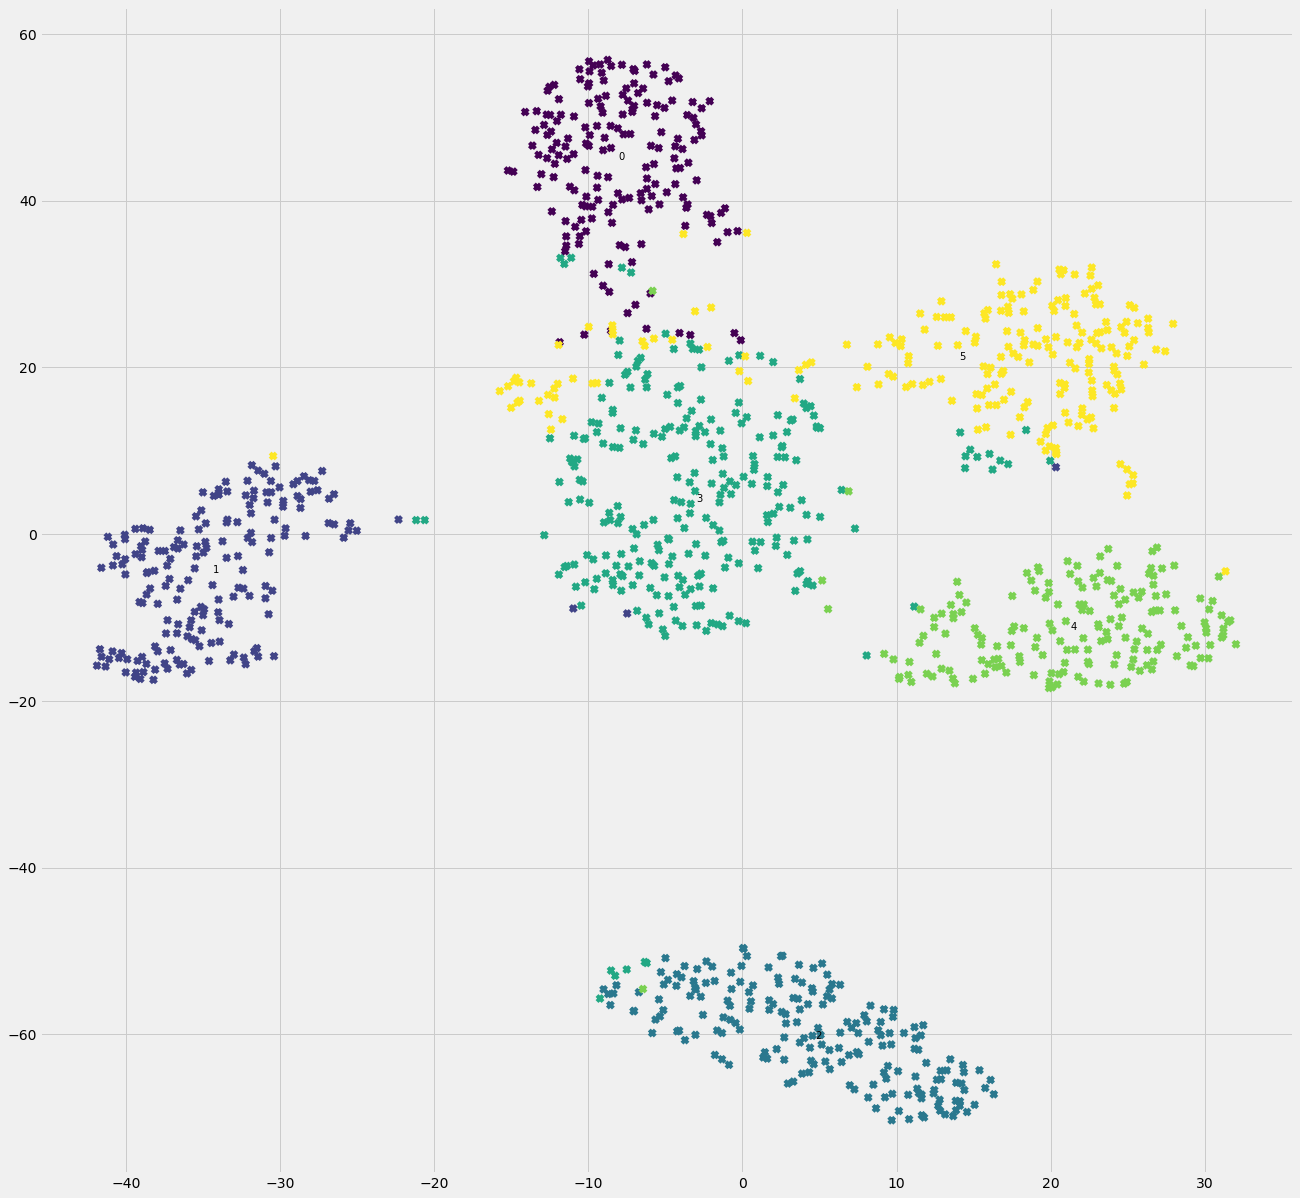

In [27]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [28]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data, y_pred)

886.9910874884273

In [29]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data)
metrics.silhouette_score(decomposition_data, km.labels_, metric='euclidean')

0.40365488488825674

In [30]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [31]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [32]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.7465556791965271

In [33]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.7513319499452

In [34]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.7489361995930038

In [35]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.7346882571574977

In [36]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.7474528075750886

In [37]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.7793019009706899

## 用 AutoEncoder 降到 5 维后再用 T-SNE 降到 2 维的结果，最后用 K-means 来聚类

In [38]:
# 选用 k 值做 K-means 算法聚类（用 AutoEncoder 降到 5 维后再用 T-SNE 降到 2 维的结果，最后用 K-means 来聚类）
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data_2d)

In [39]:
print(y_pred[:10])

[3 3 3 3 5 3 3 3 3 3]


In [40]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data_2d)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data_2d[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data_2d[i]))

In [41]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

3 -34.41405
5 18.80758
2 -4.307486
4 21.503489
0 -7.9620466
1 4.2309637


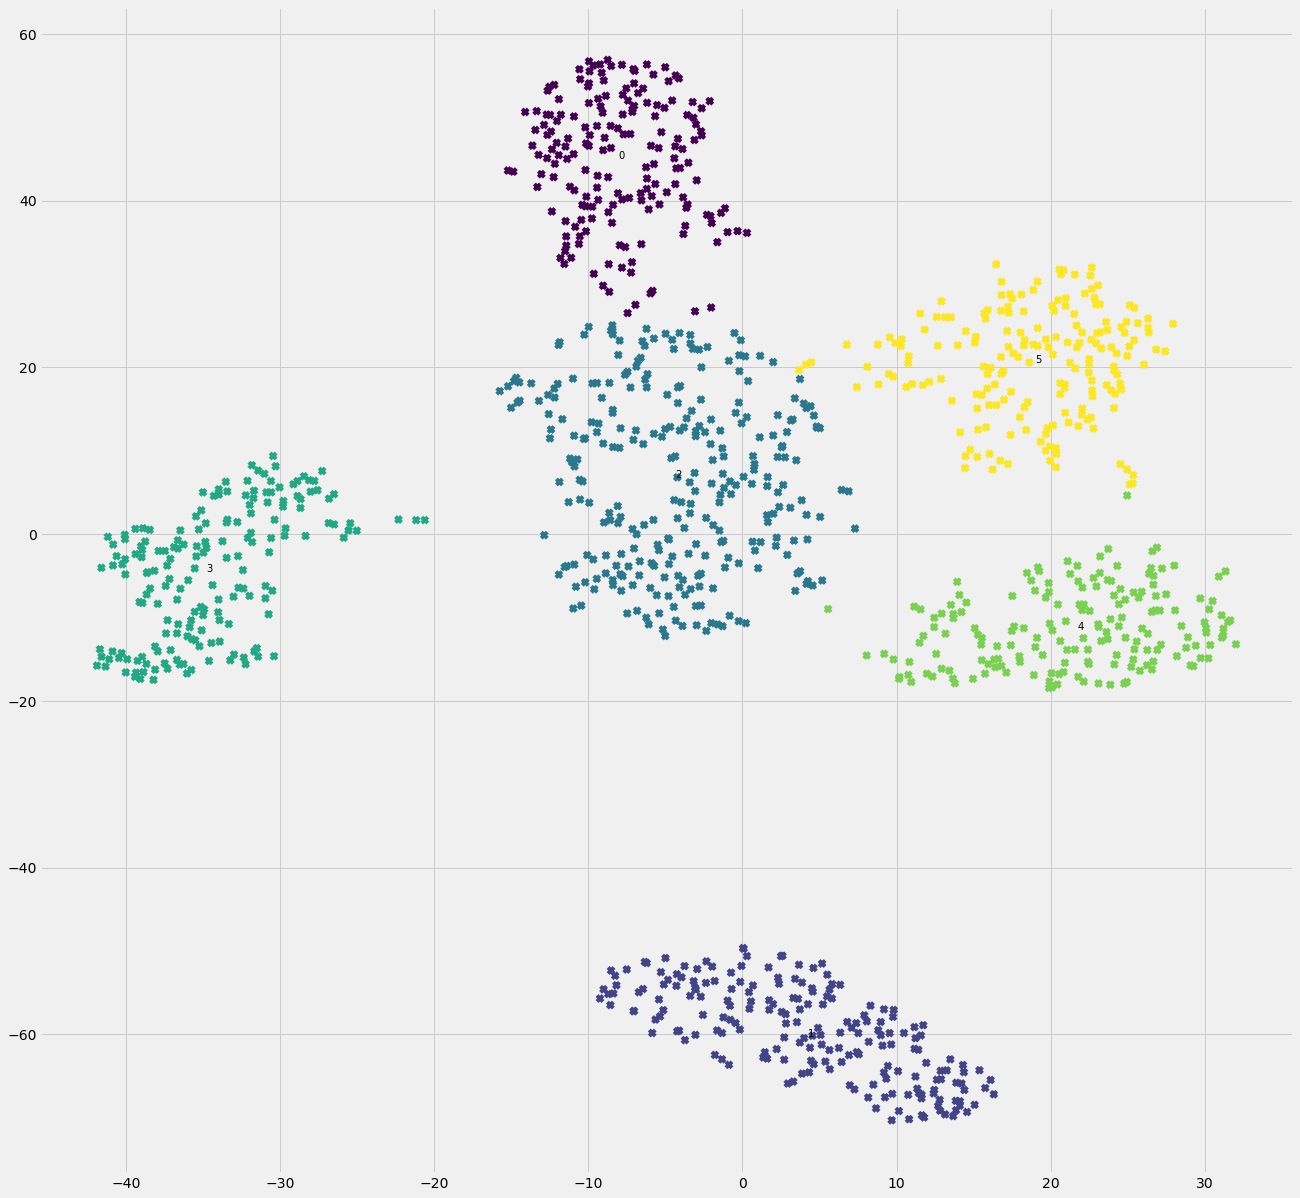

In [42]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [43]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data_2d, y_pred)

3683.9093988045406

In [44]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data_2d)
metrics.silhouette_score(decomposition_data_2d, km.labels_, metric='euclidean')

0.62479454

In [45]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [46]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [47]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.7800240076114188

In [48]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.7870280622664313

In [49]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.7835103823698262

In [50]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.7578313741610612

In [51]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.7822295641784751

In [52]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.7988341580698218